In [5]:
#importing libraries for analysis
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 

In [6]:
#Setting maximum number of columns for easier browsing of all data columns.
pd.set_option("display.max_columns" , 50)
pd.set_option("display.width" , 800)
pd.set_option("display.max_rows" , 50)

# Business - related Questions
1. What is the monthly average price per night for the city?
2. What is the average price in a week (Monday to Sunday) ?
3. What is the monthly occupancy ratio?
4. What is the average price per night for per neighbourhood?
5. What is the occupancy ratio per neighbourhood?

# Data Gathering and Assessment

In [7]:
#reading datasets
calendar = pd.read_csv ('calendar.csv.zip')
listings = pd.read_csv ('listings.csv.zip')
reviews  = pd.read_csv ('reviews.csv.zip')

In [8]:
#look at each dataset to understand the data
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
calendar.sample(12)

,listing_id,date,available,price
418361,8829089,2016-03-15,t,$100.00
449714,4264043,2016-02-07,t,$75.00
1003850,7241235,2016-04-13,f,NaN
109560,2994309,2016-03-04,t,$155.00
780356,9110410,2016-12-20,t,$88.00
1088899,8866331,2016-04-17,t,$46.00
1220807,6445769,2016-09-07,f,NaN
522755,7440415,2016-03-19,t,$180.00
353791,7093910,2016-04-19,f,NaN
872783,4264012,2016-03-12,t,$72.00


In [10]:
calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [11]:
calendar.shape

(1393570, 4)

In [12]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,...,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,...,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,...,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,...,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,https://a1.muscache.com/a

In [13]:
listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
2478,8714974,https://www.airbnb.com/rooms/8714974,20160104002432,2016-01-04,Sunny room in cozy bungalow,"Large bedroom with huge windows in a private, ...","I live in this house, and will be in the room ...","Large bedroom with huge windows in a private, ...",none,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/110509507/...,https://a1.muscache.com/im/pictures/110509507/...,https://a1.muscache.com/ac/pictures/110509507/...,https://a1.muscache.com/ac/pictures/110509507/...,1131945,https://www.airbnb.com/users/show/1131945,Sophia,2011-09-08,"Seattle, Washington, United States","I'm an avid traveler living in Seattle, WA. I ...",within a day,100%,100%,...,t,30,60,90,365,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,strict,f,f,1,NaN
493,3639023,https://www.airbnb.com/rooms/3639023,20160104002432,2016-01-04,Quiet & beautify room in Queen Anne,Private room in a beautiful Queen Anne town ho...,NaN,Private room in a beautiful Queen Anne town ho...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/87558243/b...,https://a2.muscache.com/im/pictures/87558243/b...,https://a2.muscache.com/ac/pictures/87558243/b...,https://a2.muscache.com/ac/pictures/87558243/b...,18362115,https://www.airbnb.com/users/show/18362115,Rahul,2014-07-19,"Seattle, Washington, United States",NaN,within an hour,100%,100%,...,t,30,60,90,365,2016-01-04,8,2015-06-16,2015-10-25,93.0,10.0,10.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.18
316,10265391,https://www.airbnb.com/rooms/10265391,20160104002432,2016-01-04,"Art filled, quiet, walkable Seattle","This quiet, artist apartment has lots of windo...",NaN,"This quiet, artist apartment has lots of windo...",none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/5a3b1836-2...,https://a2.muscache.com/im/pictures/5a3b1836-2...,https://a2.muscache.com/ac/pictures/5a3b1836-2...,https://a2.muscache.com/ac/pictures/5a3b1836-2...,10607280,https://www.airbnb.com/users/show/10607280,Jay,2013-12-13,"Seattle, Washington, United States",I am a Chef and a baker. I live in Seattle wi...,within an hour,100%,100%,...,t,27,57,87,362,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
1052,9426058,https://www.airbnb.com/rooms/9426058,20160104002432,2016-01-04,"Modern Apartment, Downtown-2 miles",I will be out of town and have a bedroom with ...,NaN,I will be out of town and have a bedroom with ...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/55605825-3...,https://a2.muscache.com/im/pictures/55605825-3...,https://a2.muscache.com/ac/pictures/55605825-3...,https://a2.muscache.com/ac/pictures/55605825-3...,13200167,https://www.airbnb.com/users/show/13200167,Kumail,2014-03-16,"Seattle, Washington, United States",NaN,within an hour,100%,100%,...,t,0,0,0,26,2016-01-04,1,2016-01-01,2016-01-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,3,1.00
1625,9304465,https://www.airbnb.com/rooms/9304465,20160104002432,2016-01-04,Apartment in First Hill,Walking distance to CapHill clubs/restaurants/...,NaN,Walking distance to CapHill clubs/restaurants/...,none,NaN,NaN,NaN,https://a2.muscache.com/ac/pictures/43fe3fd1-0...,https://a2.muscache.com/im/pictures/43fe3fd1-0...

In [14]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [15]:

listings.shape

(3818, 92)

In [16]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [17]:
reviews.sample(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
49303,4739190,36997866,2015-07-03,36365183,Christine,We had a very nice time in this studio with ou...
64230,1623894,13256250,2014-05-23,15392653,Ashvin,"we absolutely loved the design of the house, t..."
62630,5510720,39914938,2015-07-27,25907275,Kiyoka,Peter's place was so cozy and comfortable. It ...
75799,799882,5483614,2013-07-02,5037501,LaMonica,There's not enough I can say about Lisa and he...
20779,2586350,15542975,2014-07-11,11125952,Brian,Matt & Akiko were amazing! We arrived early an...
47366,254340,2008904,2012-08-17,2410643,Anne,Kim and Stewart were great. We did not just st...
9077,1778989,57860141,2015-12-29,50758464,Leah,The host canceled this reservation 2 days befo...
32142,719233,10822365,2014-03-09,9448329,Dena,We had a great stay at Nick's apartment and it...
55613,6262987,35583657,2015-06-20,21968548,Clement,"Sierra and Ivan are friendly, welcoming hosts...."
17302,7938153,46032098,2015-09-07,42132228,Jie,Great host & hostess! \nClean and nice master ...


In [18]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [19]:
reviews.shape

(84849, 6)

In [20]:
#missing values in any rows and columns of the dataset
print(calendar.isnull().any())
print()
print(listings.isnull().any())
print()
print(reviews.isnull().any())

listing_id    False
date          False
available     False
price          True
dtype: bool

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                    True
Length: 92, dtype: bool

listing_id       False
id               False
date             False
reviewer_id      False
reviewer_name    False
comments          True
dtype: bool


In [21]:
#converting price into float
calendar ['price'] = calendar['price'].str.replace(',','')
calendar ['price'] = calendar['price'].str.replace('$','')
calendar ['price'] = calendar['price'].astype(float)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [22]:
#convering Nan prices into 0 price
calendar['price'].fillna(0, inplace = True)
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [23]:
#converting column 'available' to a true boolean
calendar['available'] = calendar['available'] == 't'

In [24]:
calendar['available'].value_counts()

True     934542
False    459028
Name: available, dtype: int64

In [25]:
calendar['date'].min()

'2016-01-04'

In [26]:
calendar['date'].max()

'2017-01-02'

In [27]:
#converting 'date' column to a true datatype
calendar['date'] = pd.to_datetime(calendar['date'])

In [28]:
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object

# Exploratory Data Analysis

In [29]:
df = calendar.groupby('listing_id')

In [30]:
#total revenue for all rooms during the year
calendar['price'].sum()

128915264.0

In [31]:
#total yearly occupancy ratio
round(calendar['available'].mean()*100,1)

67.1

In [32]:
#average price per night
df['price'].mean().mean()

92.50720380031136

In [33]:
#total accomodation listing
calendar.shape[0]/365

3818.0

In [34]:
#average revenue per listing for the year
avg_annual_revenue = round(calendar['price'].sum()/(calendar.shape[0]/365),0)
avg_annual_revenue

33765.0

In [35]:
#extracting neighbourhood info from listings dataframe
list = listings[['id','neighbourhood_group_cleansed']]
list.head()

,id,neighbourhood_group_cleansed
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [36]:
#accomodation listings split by neighbourhood
list['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

In [37]:
#renaming neighbourhood column 
list = list.rename(index = str, columns = {"id": "listing_id", "neighbourhood_group_cleansed":"neighbourhood"})
list.head()

,listing_id,neighbourhood
0,241032,Queen Anne
1,953595,Queen Anne
2,3308979,Queen Anne
3,7421966,Queen Anne
4,278830,Queen Anne


In [38]:
#merge list and calendar dataframes into new df
new_df = pd.merge(calendar, list, on = ['listing_id', 'listing_id'])

In [39]:
#check datatypes
new_df.dtypes

listing_id                int64
date             datetime64[ns]
available                  bool
price                   float64
neighbourhood            object
dtype: object

In [40]:
#change neighbourhood to categorial variable
new_df['neighbourhood'] = new_df['neighbourhood'].astype('category')
#shorten other neighbourhoods to other 
new_df['neighbourhood'] = new_df['neighbourhood'].replace('Other neighborhoods','Other')

In [41]:
#check
new_df[new_df['neighbourhood'] == 'Other'].head()

,listing_id,date,available,price,neighbourhood
102200,314180,2016-01-04,False,0.0,Other
102201,314180,2016-01-05,False,0.0,Other
102202,314180,2016-01-06,False,0.0,Other
102203,314180,2016-01-07,False,0.0,Other
102204,314180,2016-01-08,False,0.0,Other


In [42]:
#list of months and weeks
month_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
week_list = ['Mon','Tue','Wed','Thurs','Fri','Sat','Sun']

# What is the monthly average price per night for the city?

In [43]:
#monthly average price per night
avg_price_per_night = new_df.groupby(new_df['date'].dt.strftime('%m'))['price'].mean()
avg_price_per_night = pd.DataFrame(avg_price_per_night).reset_index()
avg_price_per_night['date'] = avg_price_per_night.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
avg_price_per_night

,date,price
0,Jan,69.683499
1,Feb,82.308439
2,Mar,91.233047
3,Apr,89.683700
4,May,94.281823
5,Jun,99.453597
6,Jul,95.377854
7,Aug,97.181255
8,Sep,96.612092
9,Oct,95.444659


# What is the average price in a week (Monday to Sunday) ?

In [44]:
#weekly average price per night 
week = new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean()
week = pd.DataFrame(week).reset_index()
week['date'] = week['date'].replace(['0','1','2','3','4','5','6',], week_list)
week

,date,price
0,Mon,91.837727
1,Tue,91.052596
2,Wed,90.988420
3,Thurs,90.992873
4,Fri,91.403801
5,Sat,95.678612
6,Sun,95.624370


In [45]:
#average weekly price for 2016
weekly = round(new_df.groupby(new_df['date'].dt.strftime('%w'))['price'].mean(),2)
weekly = pd.DataFrame(weekly).reset_index()
weekly.columns = ['week_number','price']
weekly['week_number'] = weekly['week_number'].astype(int)
weekly

,week_number,price
0,0,91.84
1,1,91.05
2,2,90.99
3,3,90.99
4,4,91.40
5,5,95.68
6,6,95.62


# What is the monthly occupancy ratio?

In [46]:
#monthly occupancy ratio
occ_ratio_per_month = round(new_df.groupby(new_df['date'].dt.strftime('%m'))['available'].mean()*100,1)
occ_ratio_per_month = pd.DataFrame(occ_ratio_per_month).reset_index()
occ_ratio_per_month['date'] = occ_ratio_per_month.replace(['01','02','03','04','05','06','07','08','09','10','11','12'], month_list)
occ_ratio_per_month                                                       

,date,available
0,Jan,56.7
1,Feb,66.2
2,Mar,70.9
3,Apr,66.4
4,May,67.6
5,Jun,67.4
6,Jul,62.7
7,Aug,64.5
8,Sep,67.4
9,Oct,69.7


# What is the average price per night for per neighbourhood?

In [47]:
#average price per night for per neighbourhood top to bottom
new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)

neighbourhood
Magnolia               153.922300
Downtown               121.756030
Queen Anne             109.267509
West Seattle           103.876024
Interbay               100.104857
Central Area            90.689617
Cascade                 88.749854
Ballard                 87.159333
Capitol Hill            86.331091
Other                   84.378410
University District     77.945767
Seward Park             75.556413
Lake City               72.665876
Beacon Hill             70.750964
Delridge                67.938998
Northgate               67.547226
Rainier Valley          67.122995
Name: price, dtype: float64

In [48]:
#average price per night for a month in alphabetical order 
hood_avg_price_per_month = round(new_df.groupby('neighbourhood')['price'].mean(),2)
hood_avg_price_per_month = pd.DataFrame(hood_avg_price_per_month).reset_index()
hood_avg_price_per_month

,neighbourhood,price
0,Ballard,87.16
1,Beacon Hill,70.75
2,Capitol Hill,86.33
3,Cascade,88.75
4,Central Area,90.69
5,Delridge,67.94
6,Downtown,121.76
7,Interbay,100.10
8,Lake City,72.67
9,Magnolia,153.92


# What is the occupancy ratio per neighbourhood?

In [49]:
#monthly occupancy ratio by neighbourhood
hood_occ = round(new_df.groupby('neighbourhood')['available'].mean()*100,1)
hood_occ = pd.DataFrame(hood_occ).reset_index()
hood_occ

,neighbourhood,available
0,Ballard,69.2
1,Beacon Hill,70.3
2,Capitol Hill,64.1
3,Cascade,57.6
4,Central Area,67.2
5,Delridge,74.7
6,Downtown,65.0
7,Interbay,84.5
8,Lake City,76.9
9,Magnolia,77.5


# Creating Visualizations 

In [50]:
current_palette = sns.color_palette("copper")

In [70]:
def create_plot(dataframe,x,y,ylim,title,xlabel,ylabel,meanline="price",xticklabel=False):
     """
    Plot creates bar chart visualizations
    
    INPUTS:
    dataframe: pandas dataframe containing columns to be plotted
    x: column of dataframe as a str - example "price"
    y: column of dataframe as a str - example "date"
    ylim: int upper boundary of y-axis
    title: str title for plot - example "Title"
    xlabel: str title for x-axis - example "Xlabel"
    ylabel: str title for y-axis - example "Ylabel"
    meanline: str indicating which mean to take "price" or "occupancy"
    xticklabel: boolean True or False if labels need to be rotated 90 degrees
    
    OUTPUT:
    barchart plot
    """

    #createplot
     f, ax = plt.subplots(figsize=(8,5))
    #backgroundstyle
     sns.set_style("darkgrid")
    
     if y == "price":
        color="coral"
     else:
        color="cornflowerblue"
    
 #Plotdata 
     sns.barplot(x,y,data=dataframe,color=color,saturation=.5,)
    
 #titlesandlabels
     plt.title(title,fontsize=16)
     plt.xlabel(xlabel,fontsize=14)
     plt.ylabel(ylabel,fontsize=14)
     plt.ylim(0,ylim)

#mean line for the year
     if meanline == 'price': 
        plt.axhline(calendar[meanline].mean(),color='r',label='Avg for Year')
     else:
         plt.axhline(calendar[meanline].mean()*100,color='b',label='Avg for Year')
     plt.legend();
    
#x-axis labels and rotate vertical
     if(xticklabel):
        ax.set_xticklabels(hood_avg_price_per_month['neighbourhood'], rotation = 90,fontsize=12)
    
# Move title and plot slightly further apart
     ttl = ax.title
     ttl.set_position([.5, 1.05])
     plt.show()

# What is the average price per night?

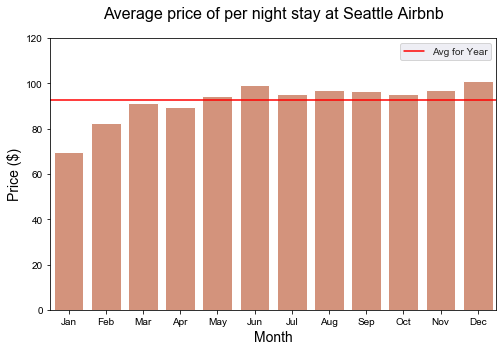

In [71]:
[create_plot(avg_price_per_night,"date","price",120,
            title = "Average price of per night stay at Seattle Airbnb",
            xlabel = "Month",
            ylabel = "Price ($)",
            meanline = "price")]; 

# What is the monthly Occupancy ratio?

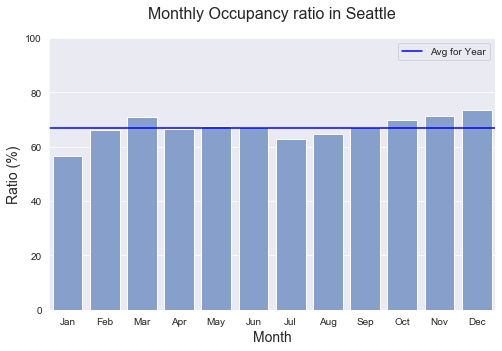

In [72]:
[create_plot(occ_ratio_per_month, "date", "available",100,
            title = "Monthly Occupancy ratio in Seattle",
            xlabel = "Month",
            ylabel = "Ratio (%)",
            meanline = "available")];

# Average price per neighbourhood in Seattle

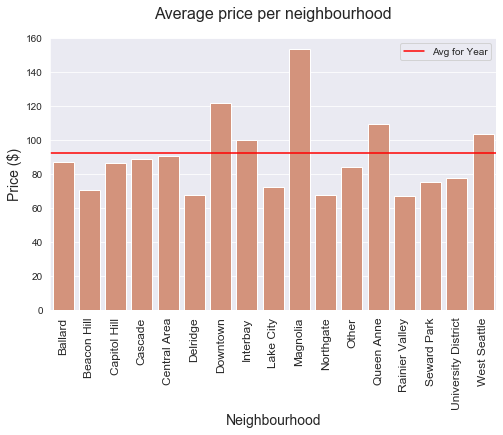

In [73]:
[create_plot(hood_avg_price_per_month, "neighbourhood", "price", 160,
            title = "Average price per neighbourhood",
            xlabel = "Neighbourhood",
            ylabel = "Price ($)",
            xticklabel = True)];